In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv")
data.info()
data.head()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [4]:
# %% Some İmportant Settings

y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)


In [5]:
# %% normalization
# (x - min(x))/(max(x)-min(x))


x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [6]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (5, 455)
x_test:  (5, 114)
y_train:  (455,)
y_test:  (114,)


In [7]:
# %% parameter initialize and sigmoid function
# dimension = 30
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b


# w,b = initialize_weights_and_bias(30)

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [8]:
# %%
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [9]:
#%% Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [10]:
#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.693327
Cost after iteration 10: 0.609783
Cost after iteration 20: 0.556064
Cost after iteration 30: 0.514955
Cost after iteration 40: 0.482699
Cost after iteration 50: 0.456758
Cost after iteration 60: 0.435436
Cost after iteration 70: 0.417577
Cost after iteration 80: 0.402375
Cost after iteration 90: 0.389253
Cost after iteration 100: 0.377791
Cost after iteration 110: 0.367673
Cost after iteration 120: 0.358661
Cost after iteration 130: 0.350569
Cost after iteration 140: 0.343251
Cost after iteration 150: 0.336591
Cost after iteration 160: 0.330497
Cost after iteration 170: 0.324891
Cost after iteration 180: 0.319712
Cost after iteration 190: 0.314908
Cost after iteration 200: 0.310434
Cost after iteration 210: 0.306254
Cost after iteration 220: 0.302336
Cost after iteration 230: 0.298654
Cost after iteration 240: 0.295184
Cost after iteration 250: 0.291908
Cost after iteration 260: 0.288806
Cost after iteration 270: 0.285863
Cost after iteration 280: 0.283

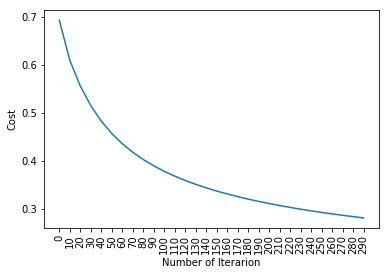

test accuracy: 94.73684210526316 %


In [11]:
# # %% logistic_regression
# def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
#     # initialize
#     dimension =  x_train.shape[0]  # that is 30
#     w,b = initialize_weights_and_bias(dimension)
#     # do not change learning rate
#     parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
#     y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

#     # Print test Errors
#     print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
# logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)    


In [12]:
#%% sklearn with LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {}".format(lr.score(x_test.T,y_test.T)))
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T


Test Accuracy 0.956140350877193


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# CONCLUSION

   Result is Test Accuracy 94.73684210526316 

   This show good accuracy. Maybe This can be better but we take the %80. Maybe we take the %90 train Accuary 98 level up 